In [13]:
# Close the port 5555 (from previous runs)
# import subprocess
# batch_file_path = r'C:\Users\yaffe\source\repos\AirSim\Close_Port_5555.bat'
# result = subprocess.run(batch_file_path, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

# Restart the kernel
# %reset -f 

# import Libaries
# import socket
# import subprocess
# import pickle
# import threading
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# # Run the API commands script
# cmd_process = subprocess.Popen('cmd', shell=True, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
# cmd_process.stdin.write(r'cd C:\Users\yaffe\source\repos\AirSim\myenv\Scripts && python API_Commands_Script.py' + '\n')  # Change directory and execute Python script
# cmd_process.stdin.flush()

In [14]:
# Debug only (If you want to run the API_COMMANDS Manually to see some outputs)
import socket
import subprocess
import pickle
import threading
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
class DroneControl_API:
    def send_command(self, command):
        self.client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.client_socket.connect(('localhost', 5555))
        self.client_socket.sendall(command.encode())  

    def take_off(self):
        self.send_command('initialize')
        self.client_socket.close()

    def motor_control(self, front_right_pwm, rear_left_pwm, front_left_pwm, rear_right_pwm, duration):
        self.send_command(f'motor_control {front_right_pwm} {rear_left_pwm} {front_left_pwm} {rear_right_pwm} {duration}')
        self.client_socket.close()

    def read_imu_data(self):
        self.send_command('read_imu_data') 
        time_tag, a_x , a_y , a_z , angular_Vel_x , angular_Vel_y , angular_Vel_z  = self.recieved_data()
        return time_tag, a_x , a_y , a_z , angular_Vel_x , angular_Vel_y , angular_Vel_z

    def capture_image (self,camera_side):
        if camera_side == 'front':
            self.send_command('render_image front_cam')

        if camera_side == 'right': 
            self.send_command('render_image right_cam')

        if camera_side == 'left':
            self.send_command('render_image left_cam')
        
        image_data = self.recieved_data()
        img1d = np.frombuffer(image_data[0], dtype=np.uint8)
        img_rgb = img1d.reshape(image_data[2], image_data[1], 3)
        # plt.imshow(img_rgb)
        # plt.show()
        
    def recieved_data(self):
        response = b''
        while True:
            part = self.client_socket.recv(4096)
            if not part:
                break
            response += part
        self.client_socket.close()
        if response != b'':
            response = pickle.loads(response)
        return response

In [16]:
class Kalman_Filter:
    def __init__(self):
        self.A = np.array([[1, 1], [0, 1]])
        self.B = np.array([[0.5], [1]])
        self.C = np.array([[1, 0]])
        self.Q = np.array([[1, 0], [0, 1]])
        self.R = np.array([[1]])
        self.P = np.array([[1, 0], [0, 1]])
        self.x = np.array([[0], [0]])

In [26]:
class IMU_Data():
    def __init__(self,API_Control):
        self.kalman_filter = Kalman_Filter()
        self.api_control = API_Control

    def run(self):
        time_list = [] 
        ax_list = [] 
        ay_list = [] 
        az_list = []
        Inital_Time, *_  = self.api_control.read_imu_data()
        self.api_control.motor_control(0.6,0.6,0.6,0.6,5)
        while True:
            time_tag, a_x , a_y , a_z , *_   = self.api_control.read_imu_data()
            ax_list.append(a_x)
            ay_list.append(a_y)
            az_list.append(a_z)
            time_list.append(1e-9*(time_tag - Inital_Time))

In [19]:
class Drone_Flight:
    def __init__(self):

        # Connect to the AirSim Simulator & Take off:
        self.API_Control = DroneControl_API()
        self.API_Control.take_off()
        self.running = True

        # Imu Class:
        self.imu_data = IMU_Data(self.API_Control)

    def start(self):
        imu_thread = threading.Thread(target = self.imu_data.run)
        imu_thread.start()

In [20]:
x = Drone_Flight()
x.start()

do it


okay2
1716840045076607232
okay33
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
mean [0.00600013 0.00300006 0.00300006 0.         0.00300006 0.
 0.00300006 0.         0.00300006 0.         0.         0.00300006
 0.         0.00300006 0.         0.00300006 0.         0.00300006
 0.         0.00300006 0.00300006 0.00300006 0.         0.00300006
 0.00300006 0.         0.00300006 0.         0.00300006 0.
 0.         0.00300006 0.00300006 0.         0.00300006 0.
 0.         0.00300006 0.         0.00300006 0.00300006 0.
 0.00300006 0.00300006 0.         0.00300006 0.         0.00300006
 0.         0.00300006]


In [21]:
# # Image capturing:
# #drone.capture_image('front')
# drone_api.capture_image('right')
# #drone.capture_image('left')
# drone_api.read_imu_data()
# drone_api.motor_control(0.02, 0.025, 0.02, 0.025, 5)

In [22]:
# client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# client_socket.connect(('localhost', 5555))
# client_socket.sendall('read_imu_data'.encode())
# client_socket.close()

In [23]:
# !netstat -ano | findstr :5555

In [24]:
# client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# client_socket.connect(('localhost', 5555))
# front_right_pwm ,rear_left_pwm, front_left_pwm,rear_right_pwm, duration = 0.1,0.1,0.1,0.1,7
# client_socket.sendall(f'motor_control {front_right_pwm} {rear_left_pwm} {front_left_pwm} {rear_right_pwm} {duration}'.encode())
# client_socket.close()

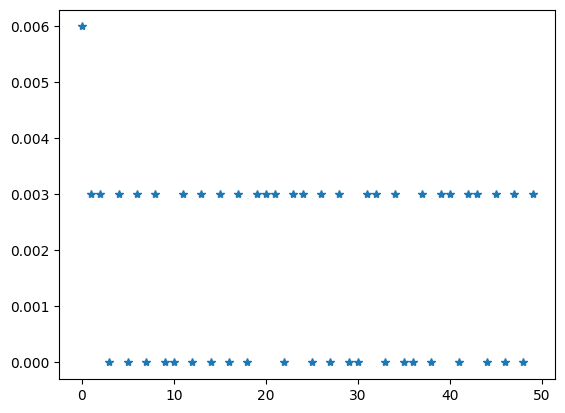

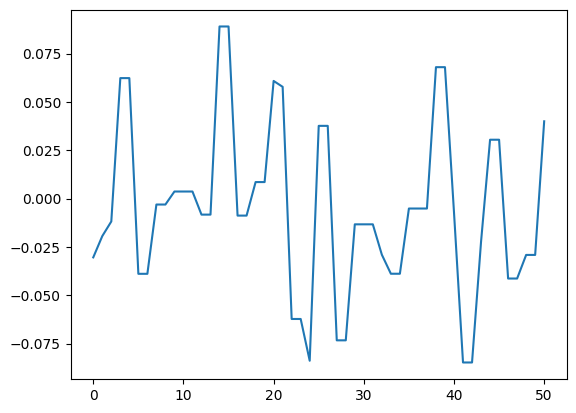

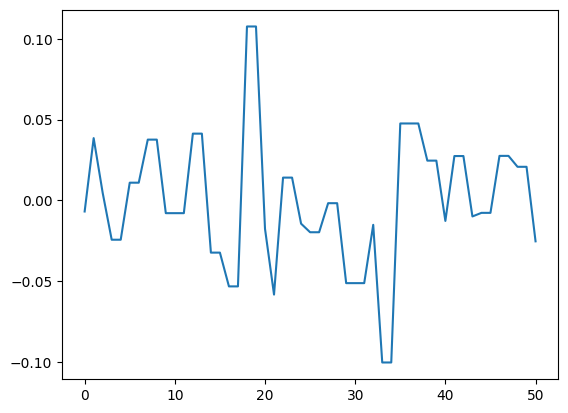

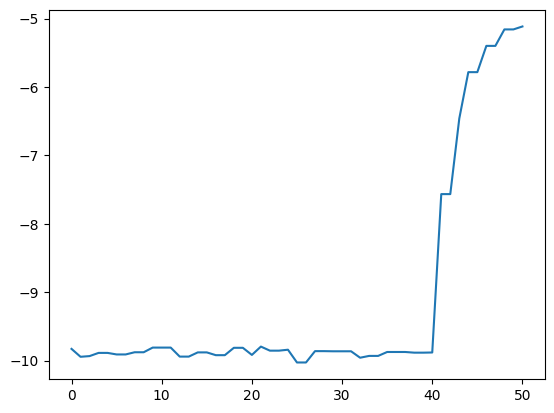

In [25]:
# !netstat -ano | findstr :5555